<a href="https://colab.research.google.com/github/Wawan13cmk/Klasifikasi-Jenis-Rambutan/blob/main/Klasifikasi_Jenis_Rambutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# lokasi file zip dan direktori tujuan
zip_file_path = '/content/archive.zip'
extract_path = '/content/jenis_rambutan' # direktori tempat Anda ingin mengekstrak

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

if not os.path.exists(zip_file_path):
    print(f"Error: File zip tidak ditemukan di {zip_file_path}")
else:
    # Ekstrak file zip
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"File berhasil diekstrak ke: {extract_path}")
    except zipfile.BadZipFile:
        print(f"Error: File {zip_file_path} bukan file zip yang valid atau rusak.")
    except Exception as e:
        print(f"Terjadi error lain saat mengekstrak file: {e}")

File berhasil diekstrak ke: /content/jenis_rambutan


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 718ms/step - accuracy: 0.3870 - loss: 1.7840
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step - accuracy: 0.3401 - loss: 1.1032
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 742ms/step - accuracy: 0.3679 - loss: 1.0953
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 782ms/step - accuracy: 0.5491 - loss: 1.0831
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 596ms/step - accuracy: 0.3910 - loss: 1.0693
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 758ms/step - accuracy: 0.5133 - loss: 1.0199
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 617ms/step - accuracy: 0.5510 - loss: 0.9516
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 746ms/step - accuracy: 0.6727 - loss: 0.8090
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 731ms/step - accuracy: 0.5947 - loss: 0.8492
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 606ms/step - accuracy: 0.7734 - loss: 0.6750


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,920,087 (37.84 MB)

 Trainable params: 3,306,695 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,392 (25.23 MB)

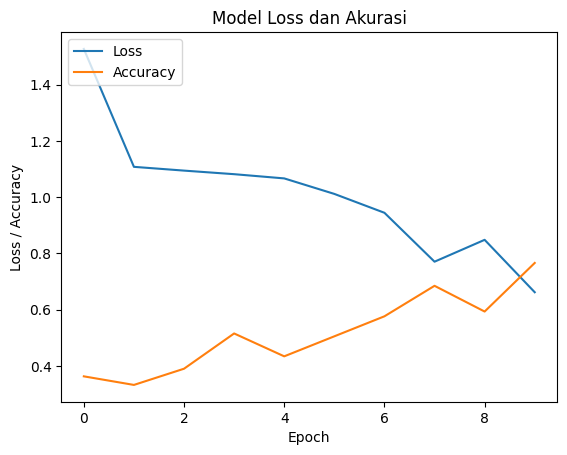

In [ ]:
import os
from keras.models import load_model
import cv2
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def LoadCitraTraining(sDir, LabelKelas):
    JumlahKelas = len(LabelKelas)
    TargetKelas = np.eye(JumlahKelas)
    X, T = [], []

    for i in range(len(LabelKelas)):
        DirKelas = os.path.join(sDir, LabelKelas[i])
        files = os.listdir(DirKelas)

        for f in files:
            ff = f.lower()
            if ff.endswith(('.jpg', '.jpeg', '.png')):
                NmFile = os.path.join(DirKelas, f)
                img = np.double(cv2.imread(NmFile, 1))
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                img = img.astype('float32')
                X.append(img)
                T.append(TargetKelas[i])

    X = np.array(X, dtype='float32')
    T = np.array(T, dtype='float32')
    return X, T

def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(JumlahKelas, activation='softmax')(x)
    ModelCNN = Model(input_img, x)
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

def TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, NamaFileBobot='weight.h5'):
    X, D = LoadCitraTraining(DirektoriDataSet, LabelKelas)
    JumlahKelas = len(LabelKelas)
    ModelCNN = ModelDeepLearningCNN(JumlahKelas)
    history = ModelCNN.fit(X, D, epochs=JumlahEpoh, shuffle=True)
    ModelCNN.save(NamaFileBobot)
    return ModelCNN, history # Complete the function by returning ModelCNN and history

# Program Utama
DirektoriDataSet = "/content/jenis_rambutan/buah rambutan"
LabelKelas = ["buah rambuan kuning", "buah rambutan aceh", "buah rambutan binjai"]
JumlahEpoh = 10
FileBobot = "WRambutan.h5"

ModelCNN, history = TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, FileBobot)
ModelCNN.summary()

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss dan Akurasi')
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper left')
plt.show()


Saving images (9).jpg to images (9).jpg


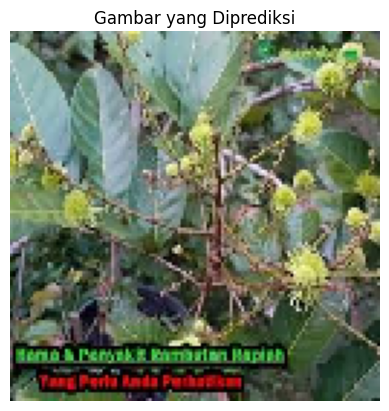

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Nama file: images (9).jpg
Hasil prediksi: buah rambutan binjai (Confidence: 0.66)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import display
from tensorflow.keras.models import load_model
import os

# Label kelas disesuaikan dengan isi dataset
LabelKelas = ["buah rambuan kuning", "buah rambutan aceh", "buah rambutan binjai"]

# Load model hasil training
ModelCNN = load_model("WRambutan.h5")

# Unggah file
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(128, 128))

    # Tampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.title("Gambar yang Diprediksi")
    plt.show()

    # Preprocessing
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    # Prediksi
    classes = ModelCNN.predict(x)
    pred_index = np.argmax(classes)
    confidence = np.max(classes)

    print(f"Nama file: {fn}")
    print(f"Hasil prediksi: {LabelKelas[pred_index]} (Confidence: {confidence:.2f})")


Folder dibuat: /content/jenis_rambutan_testing/buah_rambuan_kuning
Folder dibuat: /content/jenis_rambutan_testing/buah_rambutan_aceh
Folder dibuat: /content/jenis_rambutan_testing/buah_rambutan_binjai

🔼 Silakan upload gambar uji untuk setiap kelas:

Uploading images for class: 'buah rambuan kuning'


Saving images (8).jpg to images (8).jpg
Gambar images (8).jpg dipindahkan ke /content/jenis_rambutan_testing/buah_rambuan_kuning/images (8).jpg

Uploading images for class: 'buah rambutan aceh'


Saving images - 2023-05-10T005603.954.jpg to images - 2023-05-10T005603.954.jpg
Gambar images - 2023-05-10T005603.954.jpg dipindahkan ke /content/jenis_rambutan_testing/buah_rambutan_aceh/images - 2023-05-10T005603.954.jpg

Uploading images for class: 'buah rambutan binjai'


Saving 9.jpg to 9.jpg
Gambar 9.jpg dipindahkan ke /content/jenis_rambutan_testing/buah_rambutan_binjai/9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

✅ Akurasi: 66.67%

                      precision    recall  f1-score   support

 buah rambuan kuning       0.50      1.00      0.67         1
  buah rambutan aceh       0.00      0.00      0.00         1
buah rambutan binjai       1.00      1.00      1.00         1

            accuracy                           0.67         3
           macro avg       0.50      0.67      0.56         3
        weighted avg       0.50      0.67      0.56         3



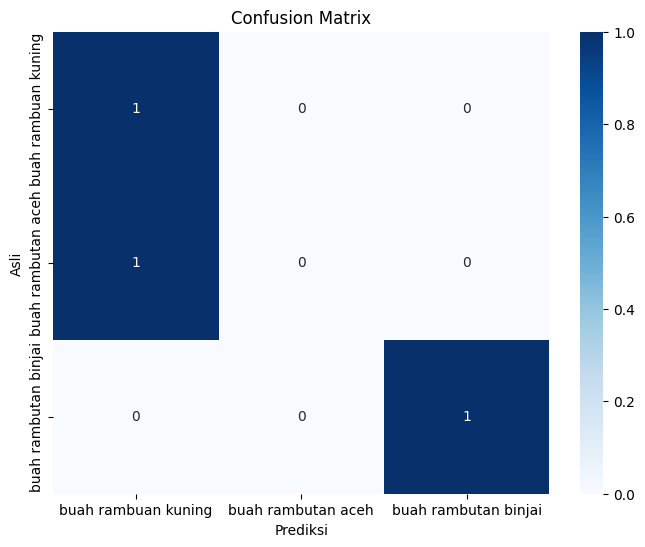

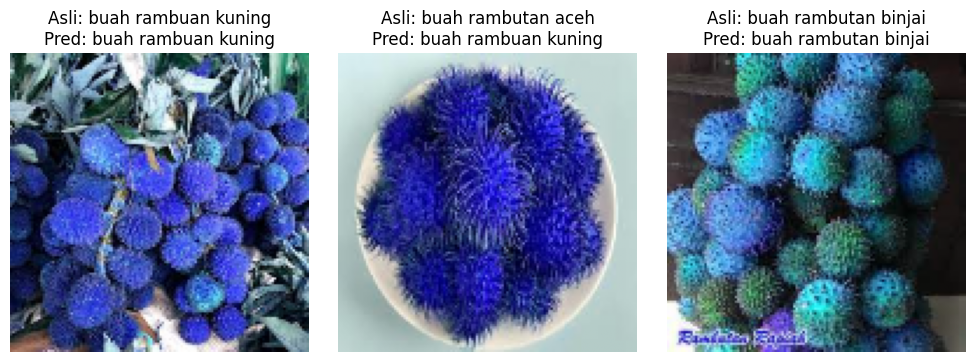

📝 Hasil disimpan di hasil_prediksi.txt


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
from google.colab import files

# ====== SETUP KELAS DAN DIREKTORI ======
LabelKelas = ["buah rambuan kuning", "buah rambutan aceh", "buah rambutan binjai"]
DirektoriTest = "/content/jenis_rambutan_testing"

# Membuat direktori dan subfolder
for label in LabelKelas:
    path = os.path.join(DirektoriTest, label.replace(" ", "_")) # Use snake_case for folder names
    os.makedirs(path, exist_ok=True)
    print(f"Folder dibuat: {path}")

# Upload gambar dari lokal untuk setiap kelas
print("\n🔼 Silakan upload gambar uji untuk setiap kelas:")

# Dictionary to map friendly label names to folder names (snake_case)
label_to_folder = {label: label.replace(" ", "_") for label in LabelKelas}

for label in LabelKelas:
    print(f"\nUploading images for class: '{label}'")
    uploaded = files.upload() # This will block until files are uploaded

    folder_name = label_to_folder[label]
    target_dir = os.path.join(DirektoriTest, folder_name)

    if uploaded:
        for nama_file in uploaded.keys():
            target_path = os.path.join(target_dir, nama_file)
            # Move the uploaded file from the current directory to the target folder
            os.rename(nama_file, target_path)
            print(f"Gambar {nama_file} dipindahkan ke {target_path}")
    else:
        print(f"Tidak ada gambar diupload untuk kelas '{label}'.")

# ====== FUNGSI LOAD CITRA TESTING ======
def LoadCitraTesting(sDir, LabelKelas):
    X_test, Y_true = [], []
    label_to_folder = {label: label.replace(" ", "_") for label in LabelKelas} # Map labels to folder names
    for label in LabelKelas:
        folder_name = label_to_folder[label]
        folder = os.path.join(sDir, folder_name)
        if os.path.exists(folder):
            for file in os.listdir(folder):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    path = os.path.join(folder, file)
                    try:
                        img = cv2.imread(path)
                        if img is not None:
                            img = cv2.resize(img, (128, 128))
                            img = img / 255.0
                            X_test.append(img)
                            Y_true.append(label)
                        else:
                            print(f"Warning: Gagal membaca gambar {path}")
                    except Exception as e:
                        print(f"Error processing image {path}: {e}")

    return np.array(X_test), Y_true

# ====== FUNGSI UJI MODEL CNN ======
def uji_model(ModelPath, LabelKelas, DirektoriTest, simpan_hasil=False):
    model = load_model(ModelPath)
    X_test, Y_true = LoadCitraTesting(DirektoriTest, LabelKelas)

    if len(X_test) == 0:
        print("❌ Tidak ada gambar uji ditemukan.")
        return [], []

    # Ensure Y_true contains unique labels present in the test set
    unique_true_labels = sorted(list(set(Y_true)))
    # Filter LabelKelas to only include labels that are actually in Y_true
    # This ensures target_names matches the classes present in the test data
    actual_target_names = [label for label in LabelKelas if label in unique_true_labels]


    Y_pred = model.predict(X_test)
    pred_indices = np.argmax(Y_pred, axis=1)
    pred_labels = [LabelKelas[i] for i in pred_indices] # Predictions are based on the original LabelKelas order

    # METRIK & LAPORAN
    # Pass the actual unique labels found in Y_true to classification_report if needed,
    # but the issue was the mismatch between ALL possible labels (LabelKelas) and the
    # subset present in Y_true. sklearn expects `labels` and `target_names` to align
    # with the unique values in y_true and y_pred.
    # A simpler fix is often ensuring all classes are present in the test set.
    # However, if not all classes are present, explicitly pass the unique labels from Y_true.
    if not unique_true_labels:
         print("Tidak ada data uji dengan label.")
         return pred_labels, Y_true

    # Map predicted labels back to their string names
    report_pred_labels = [pred_labels[i] for i in range(len(Y_true))]

    # Ensure the labels parameter for classification_report matches the unique values in Y_true and report_pred_labels
    # And target_names matches the corresponding names
    all_present_labels = sorted(list(set(Y_true + report_pred_labels)))
    report_target_names = [name for name in LabelKelas if name in all_present_labels]
    report_labels_indices = [LabelKelas.index(name) for name in all_present_labels] # Get indices from original list

    akurasi = accuracy_score(Y_true, report_pred_labels)
    print(f"\n✅ Akurasi: {akurasi * 100:.2f}%\n")

    # Use the unique labels found in the data for the report
    print(classification_report(Y_true, report_pred_labels, labels=all_present_labels, target_names=report_target_names, zero_division=0))


    # CONFUSION MATRIX
    # The confusion matrix also needs labels present in the data
    cm = confusion_matrix(Y_true, report_pred_labels, labels=all_present_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=report_target_names, yticklabels=report_target_names, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Prediksi')
    plt.ylabel('Asli')
    plt.show()

    # TAMPILKAN GAMBAR DENGAN HASIL
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(X_test))):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_test[i])
        plt.title(f"Asli: {Y_true[i]}\nPred: {pred_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # SIMPAN KE FILE
    if simpan_hasil:
        with open("hasil_prediksi.txt", "w") as f:
            for i in range(len(Y_true)):
                f.write(f"Gambar ke-{i+1}: Asli = {Y_true[i]}, Prediksi = {pred_labels[i]}\n")
        print("📝 Hasil disimpan di hasil_prediksi.txt")

    return pred_labels, Y_true

# ====== JALANKAN PENGUJIAN ======
ModelPath = "WRambutan.h5"  # Upload file ini dulu jika belum ada
prediksi, asli = uji_model(ModelPath, LabelKelas, DirektoriTest, simpan_hasil=True)

In [ ]:
# app.py
!pip install gradio opencv-python numpy
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Load model hasil training
model = load_model("/content/WRambutan.h5")

# Karena hanya ada 1 kelas dalam dataset
class_labels = ["buah rambuan kuning", "buah rambutan aceh", "buah rambutan binjai"]

def predict_image(img: Image.Image):
    img = img.resize((128, 128))  # Sesuaikan dengan ukuran input model
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0]
    result = {label: float(score) for label, score in zip(class_labels, pred)}
    return result

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=1),  # Hanya ada satu kelas
    title="Klasifikasi Buah Rambutan",
    description="Upload gambar buah rambutan dan sistem akan memprediksi jenisnya."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://18d535f46781c67620.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.6 MB/s eta 0:00:00


In [ ]:
anvil.server.connect("server_CKOFFM5NLKWTIDYOGAC4N4KX-KVUDBXQF4EKBZZAY")

NameError: name 'anvil' is not defined

In [ ]:
ModelCNN.save('WRambutan.h5')

In [ ]:
# Load model CNN
ModelCNN = load_model('WRambutan.h5')

# Daftar label sesuai urutan kelas di model
class_name = ["buah rambutan binjai", "buah rambutan kuning", "buah rambutan aceh"]




In [ ]:
@anvil.server.callable
def klasifikasi_gambar(file):
    # Baca gambar dari file (Anvil Media object)
    try:
        img_bytes = file.get_bytes()
        # Resize the image to match the model's input shape (128, 128)
        img = Image.open(io.BytesIO(img_bytes)).convert('RGB').resize((150, 150))

        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # (1, 128, 128, 3)

        # Prediksi
        pred = ModelCNN.predict(img_array)
        pred_label = class_name[np.argmax(pred)]

        # Ekstrak label dari nama file (jika file bernama: "binjai_123.jpg")
        # Note: This part assumes a specific naming convention which might not be present
        # when uploading files from Anvil. Consider if this is necessary for your use case.
        label_asli = file.name.split("_")[0] if "_" in file.name else "Tidak diketahui"

        return {
            'prediksi': pred_label,
            'label_asli': label_asli
        }
    except Exception as e:
        print(f"Terjadi error saat klasifikasi: {e}")
        return {
            'prediksi': 'Error',
            'label_asli': 'Error'
        }

In [ ]:
anvil.server.wait_forever()